# Closest pairs

In this noteobok, we are going to test the different strategies for the problem of finding the closest pairs of points in a graph.

- The **brute force** approach: eveluation of all the pairs
- The **divide to conquer** aprroch: with a split of the graph on the x-axis

In [14]:
from inputs import InputListPointsXY as Points
from utils import euclidean_distance as d

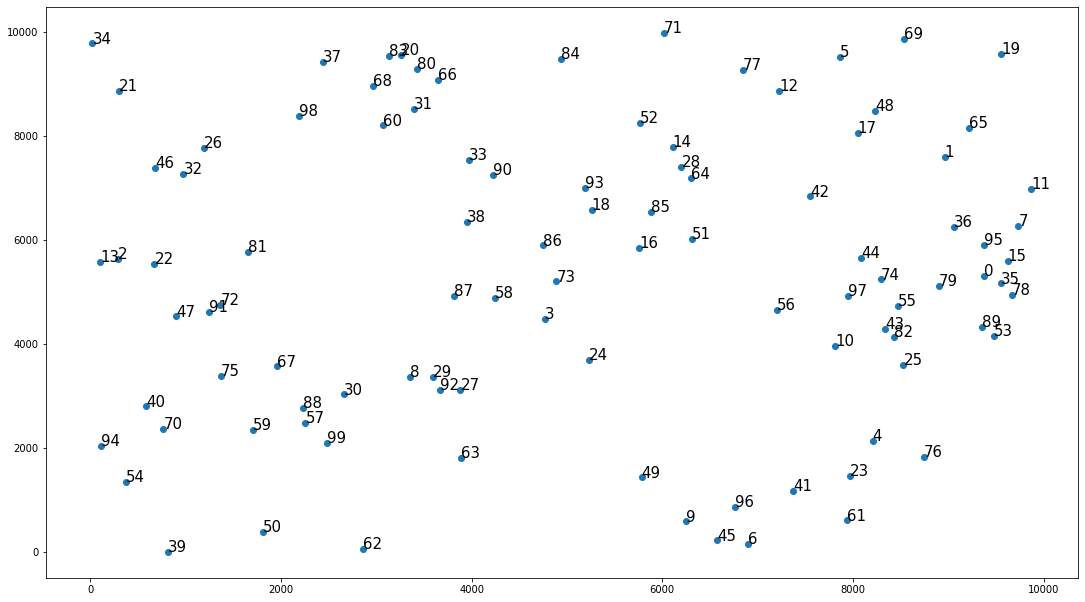

(<Figure size 1332x756 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119078610>)

In [17]:
example_points = Points(l_length=100)
example_points.plot()

## Brute force

As mentionned in the README.md file, this approach compares every pairs of points to reevaluate the minimum

In [19]:
def brute_force_closest_pairs(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:]):
            if d(point1, point2) < min_distance:
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
                print(f'The minimal distance between the points is now {d(point1, point2)}')
    return point_min1, point_min2, min_distance

brute_force_closest_pairs(Points(l_length=1000))

The minimal distance between the points is now 1723.0026117217583
The minimal distance between the points is now 1345.0895880944138
The minimal distance between the points is now 510.3802504016001
The minimal distance between the points is now 479.22646003742324
The minimal distance between the points is now 274.4758641483801
The minimal distance between the points is now 140.24621207005913
The minimal distance between the points is now 83.23460818673925
The minimal distance between the points is now 58.82176467941097
The minimal distance between the points is now 24.041630560342615
The minimal distance between the points is now 15.033296378372908
The minimal distance between the points is now 9.486832980505138


(158, 482, 9.486832980505138)

Note that the if statement is true around 10 times for a 1000-point long list, which is an indicator of the lack of performance of the algorithm. 
More precisely the nested loops have 1000 choose 2 = **499500** iterations.

Let's compute the indicator of performance as:
`nb of reeavaluations of the min / nb of itarations`

In [42]:
def brute_force_closest_pairs_performance(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    # Initialize the counters
    nb_itarations, nb_reevaluations_min = 0, 0
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:]):
            nb_itarations += 1
            if d(point1, point2) < min_distance:
                nb_reevaluations_min += 1
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
    return round((nb_reevaluations_min / nb_itarations) * 100, 3)

print(f'The indicator of the performance of the algorithm could be: \n \
    {brute_force_closest_pairs_performance(Points(l_length=1000))} %')

The indicator of the performance of the algorithm could be: 
     0.003 %


You can run the previous cell several times and see that it stays under the 0.01%

##### TO-DO
Let's draw the line between the two closets pair as a semi-proof of correctness